# Programa para modelo da Curva de Rotação Galáctica

Inicialmente, importamos as funções e declaramos os parâmetros para gerar os gráficos

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib

plt.rcParams['font.size'] = 10
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['xtick.labelsize'] = 'xx-large'
plt.rcParams['ytick.labelsize'] = 'xx-large'
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['legend.frameon'] = False
plt.rcParams['lines.linewidth'] = 2

Em seguida, importamos os dados do arquivo do Clemens

In [171]:
clemens = np.loadtxt('CLEMENS.prn') #LÊ O ARQUIVO QUE ESTÁ NA MESMA PASTA DO PROGRAMA

r_gal = clemens[:,0] #PRIMEIRA COLUNA É O RAIO EM KPC
v_gal = clemens[:,1] #SEGUNDA COLUNA É A VELOCIDADE EM KM/S

Em seguida, plotamos os dados da curva (obtidos para $R_{\odot}=10Kpc$) e o a cura corrigida para $R_{\odot}=7.5Kpc$ através da relação 

$$l = \arcsin(r_{clemens}/10), \\ r_{novo} = R_{\odot}\sin(l)$$

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in arcsin
  if __name__ == '__main__':


Text(0.5, 0.98, 'Curva de Rotação Experimental')

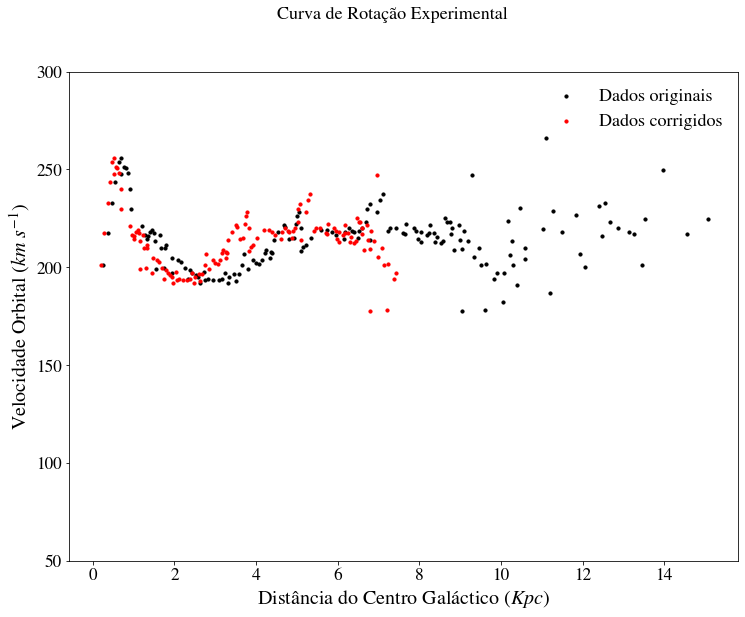

In [172]:
#### ESSA PARTE DO CÓDIGO PLOTA OS PONTOS EXPERIMENTAIS OBTIDOS PELO CLEMENS
r_sun = 7.5

fig, ax = plt.subplots(figsize = (12, 9))

ax.scatter(r_gal, v_gal, s = 10, c = 'k', label = r'Dados originais')
ax.set_ylim(50, 300)

l = np.arcsin(r_gal/10)
rsn = r_sun*np.sin(l)
ax.scatter(rsn, v_gal, s = 10, c = 'r', label = r'Dados corrigidos')
ax.legend()

ax.set_xlabel(r'Distância do Centro Galáctico ($Kpc$)')

ax.set_ylabel(r'Velocidade Orbital ($km \ s^{-1}$)')

fig.suptitle(r'Curva de Rotação Experimental', fontsize = 18)

#fig.savefig('plot_curva_rotacao_clemens_raio_corrigido.pdf', dpi = 200)

Em seguida, declaramos algumas constantes (cgs) que serão utilizadas

In [173]:
solmass = 1.989e+33 #Massa Solar em Gramas
parsec = 3.086e+18 #Unidade do PArsec
constG = 6.67e-08 #Constante Gravitacional 
r0=7.5 #Raio solar
Mboj=(1.8e+10) #Massa do Bojo em massas solares
aboj=0.27 #Escala de distância para potencial de Hernquist
sig01=40.       #densidade superficial do disco fino
sig02=0.1*sig01 #densidade superficial do disco espesso
siggas0=sig01*0.5

am=1000*solmass*constG/parsec


In [174]:
npontos=200 #Número de pontos em que o raio r vai ser dividido
nptx=100 #Número de pontos em que a força vai ser calculada

Abaixo estão definidas as funções para cálculo da variação da densidade de matéria. Uma vez que é ocnsiderado um disco axis-simétrico, esta densidade somente depende da variável radial e pode ser escrita como

$$\rho(r) = \exp \left[-\frac{r}{a}-\left(\frac{b}{r}\right)^{2}\right]$$

Onde $a$ e $b$ são parâmetros que variam com relação à posição radial.

In [175]:
def dens1a(r):
    a=4.5
    b=3.2
    densf=np.exp(-r/a -(b/r)**2)
    return densf
    
    
def dens2a(r):
    a2=4.5
    b2= 3.2
    densesp = np.exp(-r/a2 -(b2/r)**2)
    return densesp

def densgasa(r):

    a3=8
    b3=3.5
    densg = np.exp(-r/a3 -(b3/r)**2)
    return densg

A galáxia será dividida em anéis de raio $dr$ que, por sua vez, serão divididos em ângulos $d\theta$. 

O cálculo da força resultante em um ponto $x_{i}$ na direção radial da Galáxia é feito somando-se as forças resultantes de cada setor de cada anel neste ponto $x_{i}$

$$F = \sum_{r{i}} \sum_{\theta_{i}}\frac{G\rho(r_{i})A(r, \theta_{i})}{d^{2}}$$

onde $A(r, \theta)$ é a área de cada setor e $d$ é a distância do ponto $x_{i}$ até o centro do setor, obtidos conforme o esquema abaixo:

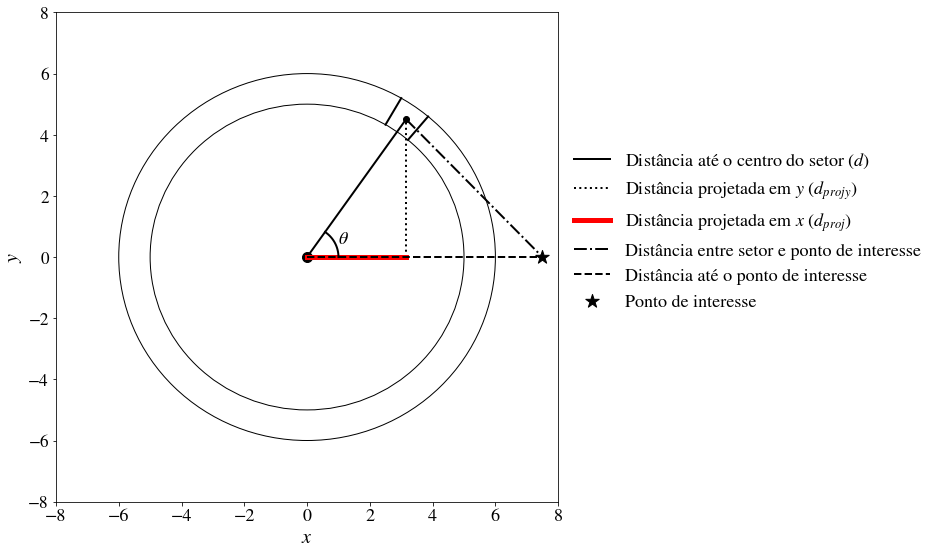

In [176]:
plt.figure(figsize=(9,9))
plt.gca().add_patch(plt.Circle((0,0),radius=6,fc='none',ec='k',zorder=0))
plt.gca().add_patch(plt.Circle((0,0),radius=5,fc='none',ec='k',zorder=0))
#plt.gca().add_patch(plt.Circle((0,0),radius=.04,fc='k',ec='none',zorder=2))

plt.plot([5*np.cos(50*np.pi/180), 6*np.cos(50*np.pi/180)], 
         [5*np.sin(50*np.pi/180), 6*np.sin(50*np.pi/180)], c = 'k')

plt.plot([5*np.cos(60*np.pi/180), 6*np.cos(60*np.pi/180)], 
         [5*np.sin(60*np.pi/180), 6*np.sin(60*np.pi/180)], c = 'k')

plt.scatter([5.5*np.cos(55*np.pi/180)], [5.5*np.sin(55*np.pi/180)], c = 'k')

plt.plot([0, 5.5*np.cos(55*np.pi/180)], [0, 5.5*np.sin(55*np.pi/180)], c = 'k', 
         label = r'Distância até o centro do setor $(d)$')

plt.plot([5.5*np.cos(55*np.pi/180), 5.5*np.cos(55*np.pi/180)],
         [0, 5.5*np.sin(55*np.pi/180)], c = 'k', linestyle = ':', 
         label = r'Distância projetada em $y$ $(d_{projy}$)')

plt.plot([0, 5.5*np.cos(55*np.pi/180)],
         [0, 0], 'r', linewidth = 5, label = r'Distância projetada em $x$ $(d_{proj})$')


plt.plot([5.5*np.cos(55*np.pi/180), r_sun], [5.5*np.sin(55*np.pi/180), 0], c = 'k', linestyle = '-.', 
        label = r'Distância entre setor e ponto de interesse')

plt.plot([0,r_sun], [0, 0], c = 'k', linestyle = '--', label = r'Distância até o ponto de interesse')

plt.scatter(r_sun, 0, c = 'k', marker = '*', s = 200, label = r'Ponto de interesse')

thetas = np.linspace(0, 55*np.pi/180, 100)
plt.plot(1*np.cos(thetas), 1*np.sin(thetas), c = 'k')
plt.annotate(r'$\theta$', (1.1*np.cos(25*np.pi/180), 1.1*np.sin(25*np.pi/180)), fontsize = 18)

plt.legend(ncol = 1,bbox_to_anchor=(1., 0.75))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.scatter(0, 0, c = 'k', s = 100)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xticks(size = 18);
#plt.gca()._frameon= False
#plt.gca().xaxis.set_visible(False)
#plt.gca().yaxis.set_visible(False)

Pelo desenho acima, a distância $d^{2}$ pode ser obtida pela relação $d^{2} = d_{proj}^{2}+(d_{projy}\sin(\theta))^{2}$ e $d_{proj}=x_{i}-d\cos(\theta)$

In [177]:
r=np.linspace(0, 15, npontos, endpoint = False) #definicao dos raios dos aneis,  até 15 kpc
dr = r[1]-r[0]

x=np.linspace(0, 15, nptx, endpoint = False)    #definicao dos pontos onde a curva é calculada
dx = x[1]-x[0]

sig1= sig01*dens1a(r)/dens1a(r0)   #disco fino normalizado para ter sig01 em Ro
sig2= sig02*dens2a(r)/dens2a(r0)    #disco espesso
siggas= siggas0*densgasa(r)/densgasa(r0) #gas
sigma= sig1 + sig2 +siggas #densidade estrelas + gas, so depende do raio

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


## Escolha das unidades

* Densidade Superficial de Massa é definida em Massas Solares por Parsec Quadrado $(M_{\odot}/pc^{2})$
* Distâncias estão em $Kpc$, de modo que as áres estão em $Kpc^{2}$
* Área $A(r, \theta)[Kpc^{2}]\times 10^{6}\times\rho(r)[pc^{-2}] = M_{\odot}$ em Massas Solares
* $GM/r^{2}=F/m=v^{2}/r$, ou $GM/r=v^{2}$, em $cgs$

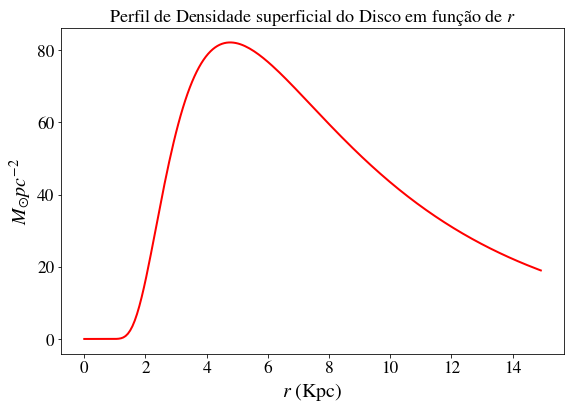

In [178]:
plt.figure()
plt.plot(r, sigma, c = 'r')
plt.xlabel(r'$r$ (Kpc)')
plt.ylabel(r'$M_{\odot}pc^{-2}$')
plt.title(r'Perfil de Densidade superficial do Disco em função de $r$', size = 18);

Abaixo, divide-se o disco (anel) em $n=90$ setores, cada um com $d\theta=\pi/n_{setores} = 1^{o}$, d emodo a se considerar somente o resultado da contirbuição dos anéis com $y\geq0$

In [179]:
nsetor=90
dtet= 1*np.pi/nsetor#np.pi*nsetor/180. #acho que tem problema auqi, vamo vendo 

In [193]:
dtet*180/(np.pi)

2.0

In [181]:
(np.pi*1/180/npontos)

8.726646259971648e-05

Abaixo, é calculado po ponto médio de cada setor definido pelos lados $r+dr$ e $\theta+d\theta$, bem como a área de cada setor 

In [194]:
rm= []
areaset = []
for j in range(1, npontos):
    rm1 = r[j-1] + (r[j]-r[j-1])/2 
    rm.append(rm1)
    areaset.append(2*np.pi*rm1*deltar/nsetor)

em seguida, é calculada a força total da soma de todos os setores em cada ponto $x_{i}$

$$F_{k} = \sum_{i}^{n_{r}}\sum_{j}^{n_{\theta}}\frac{GA(r_{i},\theta_{j})\rho(r_{i})}{d_{k}(r, \theta)^{2}}$$

In [195]:
ftot = 0.
delt2 = 2*deltar**2
forca = []
vdisk = []
for i in range(len(x)):
    ftot=0.
    for j in range(len(rm)):
        for k in range(nsetor):
            dproj=(x[i]-rm[j]*np.cos(k*dtet))
            dist2=dproj**2 + (rm[j]*np.sin(k*dtet))**2# ;distancia entre o ponto i e o setor cuja contrib esta sendo somada
            if (dist2 < delt2):
                dist2=delt2
            fgrav= areaset[j]*sigma[j]/dist2
                #    fgravproj=fgrav*dproj/np.sqrt(dist2)# ; os dois ultimos termos sao o cos do angulo, so nos interessa essa componente
            ftot+=fgrav
    forca1=2*ftot   #isto porque integramos de 0 a 90 em vez de zero a 180
    forca.append(forca1)
    vdisk1=np.sqrt(2*ftot*am)*1e-05 #; multiplic por G, msassa solar,e dividindo por 1000 parsec ao quadrado fica tudo em cgs
    vdisk.append(vdisk1)

Abaixo, é adicionada a contribuição do potencial do Bojo de acordo com o perfil de densidade de Hernquist. Por ele, a contribuição do Bojo galáctico para a velocidade de rotação é dada por 

$$v_{c}(r) = \frac{\sqrt{GM_{bojo}r}}{(r+a)},$$

onde $a$ é um fator de escala que foi adotando como sento $a = 0.27$ aqui.

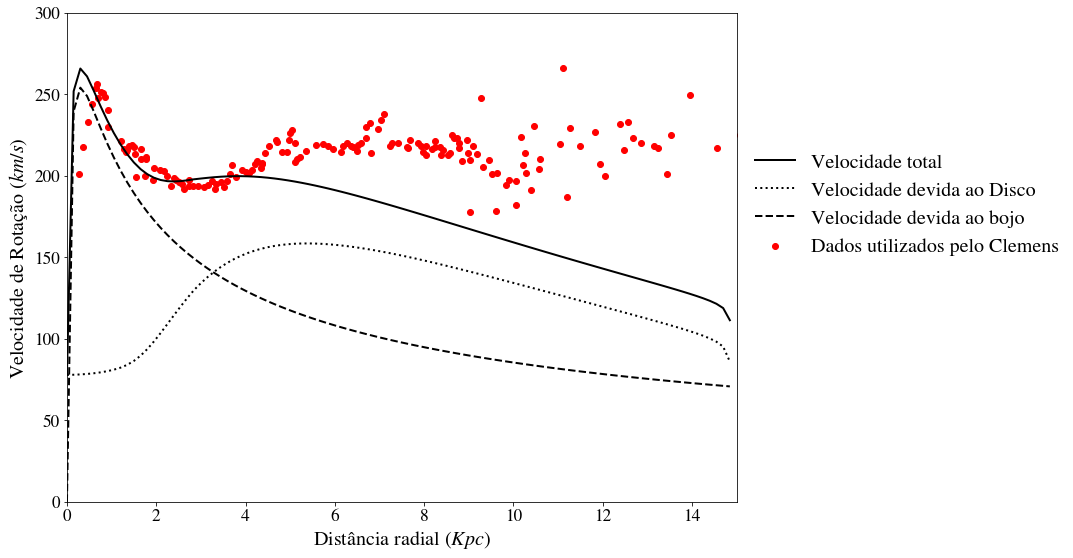

In [209]:
#aboj= 0.3
ab1=constG*solmass*Mboj
ab2=np.sqrt(1000*parsec)
#;rb=findgen(70)/10.
vb=1e-05*np.sqrt(ab1*x)/((x+aboj)*ab2)
plt.figure(figsize = (12, 9))
plt.scatter(r_gal, v_gal, c = 'r', label = r'Dados utilizados pelo Clemens')




vtot=np.sqrt(np.array(vb)**2 + np.array(vdisk)**2)

plt.plot(x, vtot, c = 'k', label = r'Velocidade total')
plt.plot(x, vdisk, c = 'k', linestyle = 'dotted', label = r'Velocidade devida ao Disco')
plt.plot(x, vb, c = 'k', linestyle = '--', label = r'Velocidade devida ao bojo')
plt.legend(bbox_to_anchor=(1., 0.75), fontsize = 20)
plt.ylim(0, 300)
plt.xlim(0, 15)
plt.xlabel(r'Distância radial $(Kpc)$', size = 20)
plt.ylabel(r'Velocidade de Rotação $(km/s)$', size = 20)

plt.savefig('teste_curva_rotacao_aneis.pdf', dpi = 200)
plt.savefig('teste_curva_rotacao_aneis.png', dpi = 200)

In [84]:
r = 8
theta1 = np.linspace(0, 2*np.pi, 100)
setores = 90



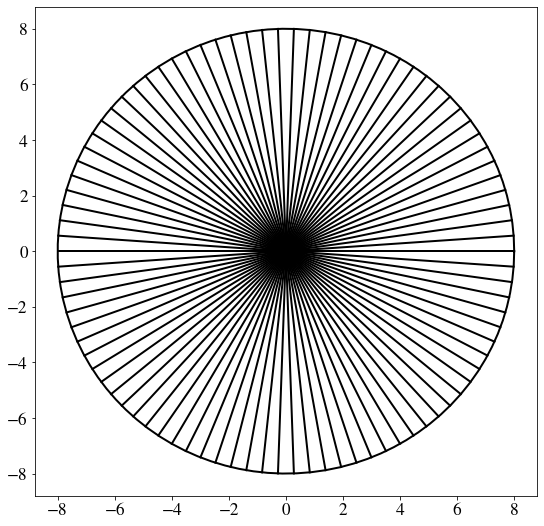

In [85]:
plt.figure(figsize = (9, 9))
plt.plot(r*np.cos(theta1), r*np.sin(theta1), c = 'k')

for i in range(setores):
    plt.plot([0, r*np.cos(i*2*np.pi/setores)], [0, r*np.sin(i*2*np.pi/setores)], c = 'k')

In [87]:
(2*np.pi/setores)*180/np.pi

4.0